<br>

# **Project Description**

This project involves sentiment analysis focusing on issues faced by major U.S. airlines. The dataset consists of Twitter data collected in February 2015, where contributors categorized tweets as positive, negative, or neutral. For negative tweets, contributors also identified specific reasons, such as 'late flight' or 'rude service.'

The dataset provides sentiment labels for tweets related to six U.S. airlines, indicating whether the sentiment is positive, neutral, or negative:

Key attributes in the dataset include:

**airline_sentiment**: Sentiment classification of tweets (positive, neutral, or negative).
**negativereason**: Specific reason for negative sentiment.
**airline**: Name of the U.S. airline ('Delta', 'United', 'Southwest', 'US Airways', 'Virgin America', 'American').
**text**: The tweet content expressing the customer's opinion

<br>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

import pickle, joblib

<br>

## Data Load

In [ ]:
df = pd.read_csv('Tweets.csv')

display(df.shape, df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

(14640, 15)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


None

<br>

* **`airline`** : Does not contain null data. I will add this feature in stopwords.
* **`name`** : Will add this feature in stopwords.
* **`text`** : Does not contain null data. Every text begins with @ due to the characteristic of twitter. In addition, we can see emoji on the text.
* **`negativereason`** : Blank if `sentiment` is not ''negative.
* **`alirline_sentiment`** : Does not contain null data.

<br>

## EDA

### Total count per Airlines

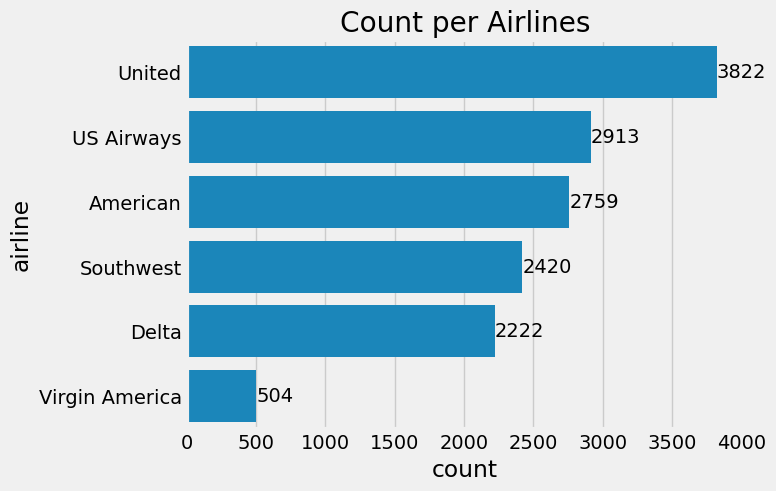

In [ ]:
ax = sns.countplot(data = df, y = 'airline',
                   order = df.airline.value_counts().index)
ax.bar_label(ax.containers[0])
ax.set_title('Count per Airlines',)

plt.show()

<br>

### Proportion of Sentiments

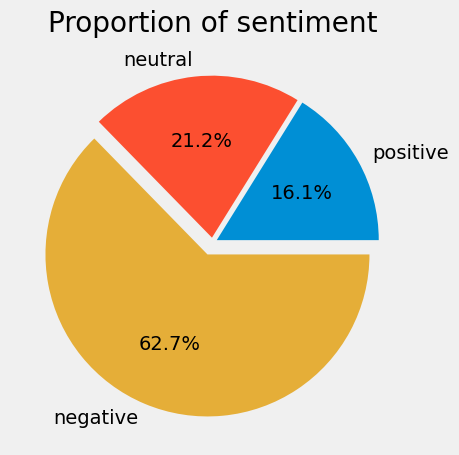

In [ ]:
x = df.airline_sentiment.value_counts().sort_values()

plt.figure(figsize=(5, 5))
ax = plt.pie(x = x, labels=x.index, autopct = '%1.1f%%', explode = [0.03, 0.03, 0.08])
plt.title('Proportion of sentiment')

plt.show()

In [ ]:
a = df.groupby(['airline', 'airline_sentiment'])['airline_sentiment'].count().unstack()
# a['total'] =  [a.values[x].sum() for x in range(0,6)]
a

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [ ]:
# b = sorted(list(dict(df.airline.value_counts()).items()), key = lambda x : x[0])
# print(b)

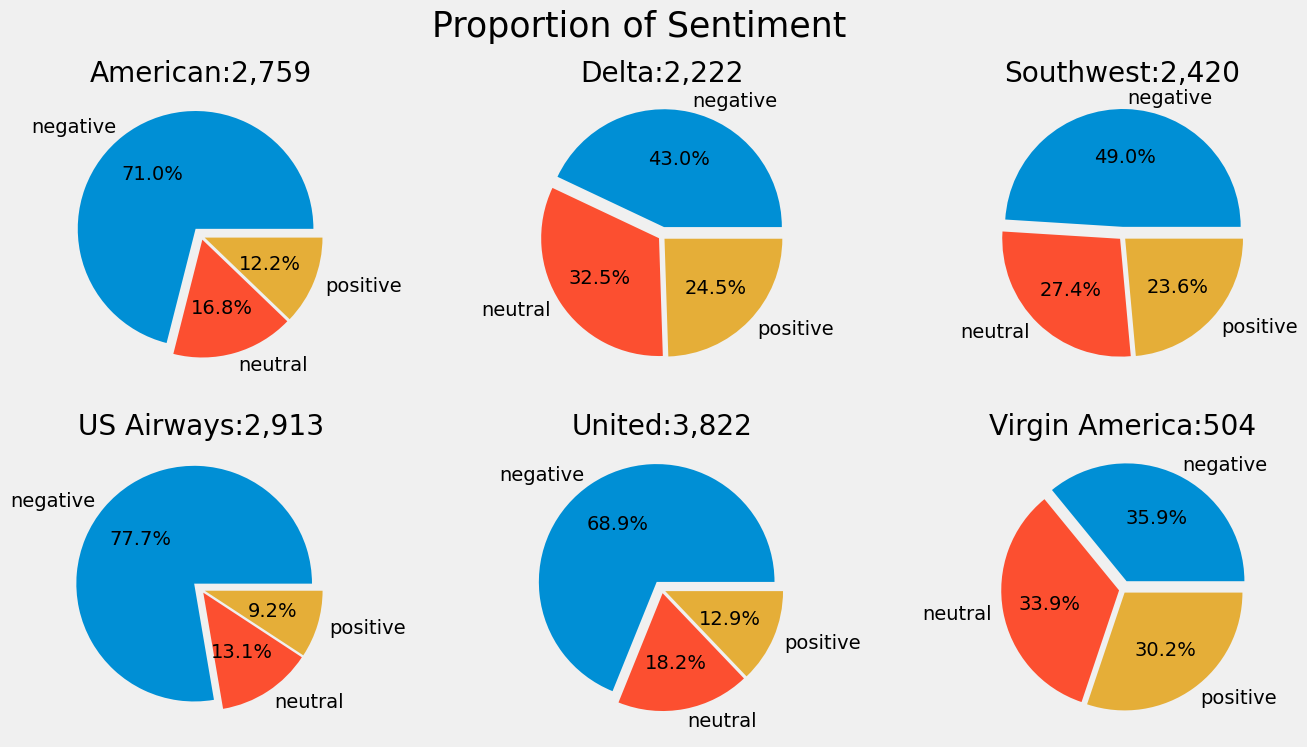

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()
for i, ax in zip(range(0, 6), axes):
    temp = a.iloc[i]
    ax.pie(x = temp, labels = temp.index, autopct = '%1.1f%%', explode = [0.08, 0.03, 0.03])
    ax.set_title(f"{a.index[i]}:{format(a.values[i].sum(),',')}")

plt.suptitle("Proportion of Sentiment", fontsize = 25)
plt.show()

<br>

I think it is interesting to compare the twitter data with another real data to check the coherence of the customer's sentiment to each airlines.

<br>

**[The overall performances of the largest U.S. airlines on the Middle Seat scorecard, from 2015 to 2017]**

<img src='https://si.wsj.net/public/resources/images/BN-WX851_backgr_4U_20180110102611.jpg'>


<source: https://www.wsj.com/articles/the-best-and-worst-airlines-of-2017-1515594783>

<br>

* **`American`**, **`US Airways`**: American airlines merged US Airways on 2015. Coincidentally or not, the sentiment for these two airlines shows negative in general. In addtion, the above overall performances from 2015 to 2017 explain it is somewhat reasonable to feel negative to them.

* **`United`**: 68.9% of people felt it negative.

* **`Delta`**, **`Southwest`**: Better than `American` and `US Airways` as the proportion of negative sentiment is less than 50%.

* **`Virgin America`**: The proportion of sentiments is very well-balanced, but the count is not as many as the other's one. It has been merged with Alaska on 2017.

<br>

### Reason for Negative sentiment

In [ ]:
print(df.negativereason.unique())

[nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']


In [ ]:
print(df[df.negativereason == '']['airline_sentiment'].unique())
print(df[df.negativereason != '']['airline_sentiment'].unique())

[]
['neutral' 'positive' 'negative']


Negative sentiment only has the value of negativereason.

<br>

In [ ]:
df_neg = df[df.airline_sentiment == 'negative']
display(df_neg.shape, df_neg.head())

(9178, 15)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)


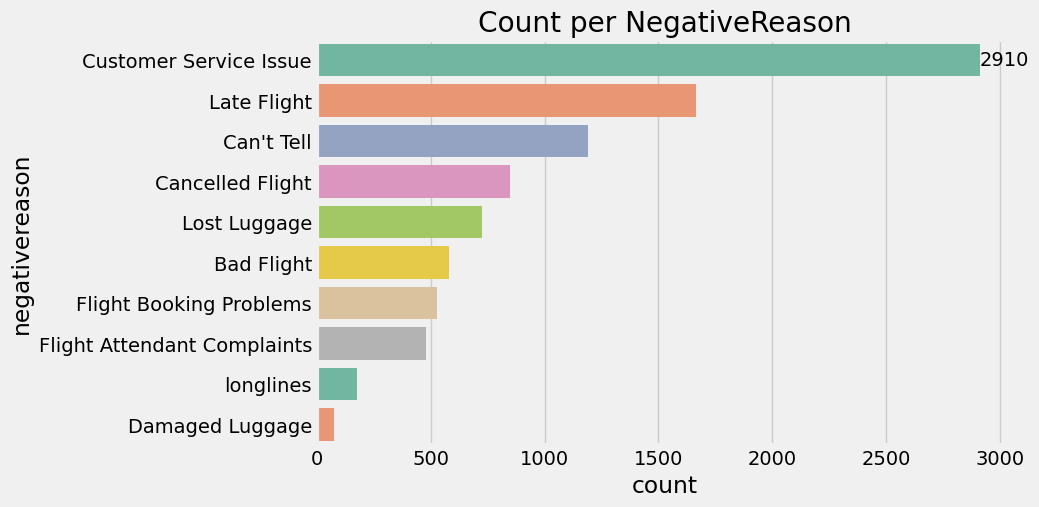

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data = df_neg, y = 'negativereason',
                   palette='Set2',
                   order = df_neg.negativereason.value_counts().index)

ax.bar_label(ax.containers[0])
ax.set_title('Count per NegativeReason')

plt.show()

<br>

Customer service issue, as a whole, is the main reason for the negative sentiment to the airlines.

The following is the detail sorted by airlines' name.

<br>

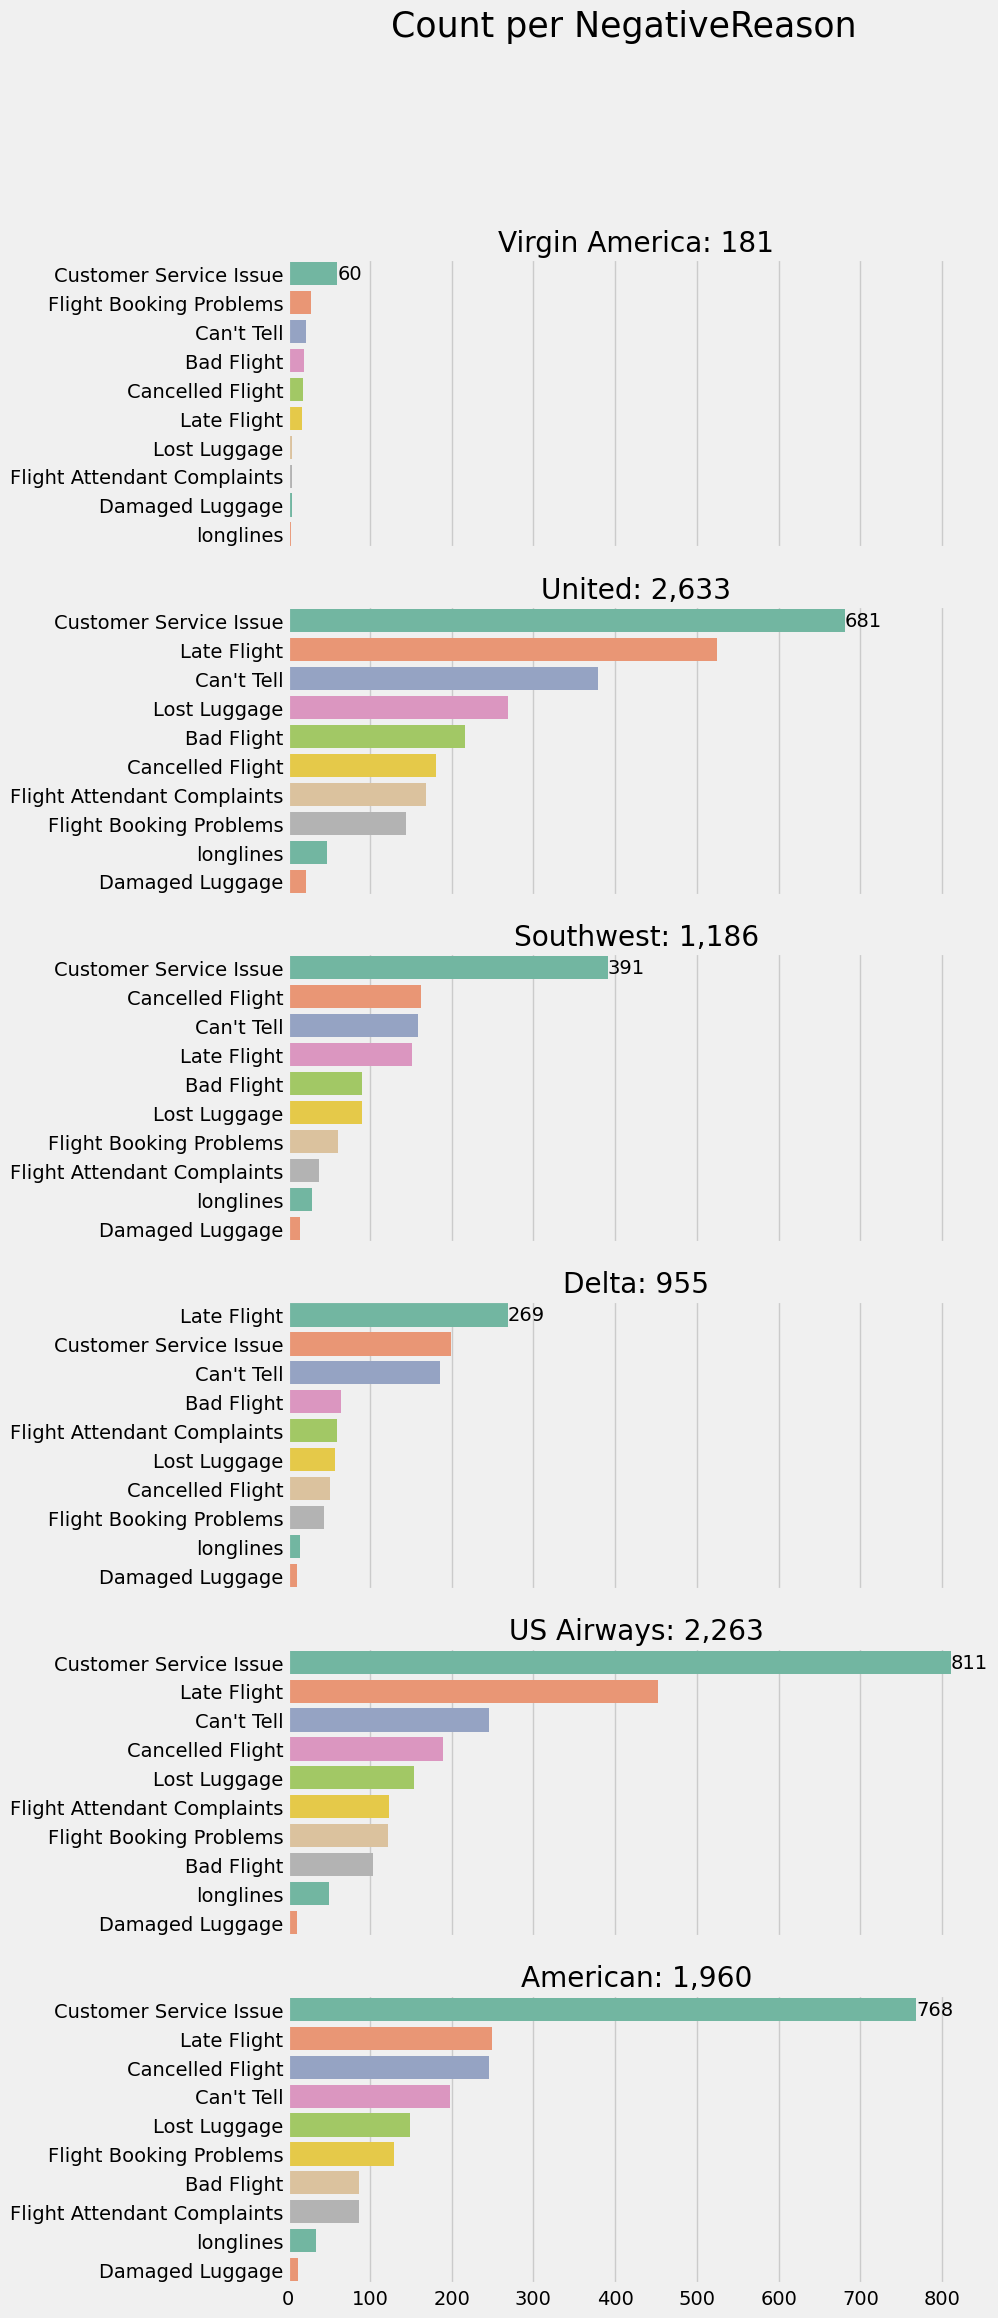

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(8, 25), sharex=True)
axes = axes.flatten()
names = df_neg['airline'].unique()

for name, n in zip(names, axes):
    ax = sns.countplot(data = df_neg[df_neg.airline==name], y = 'negativereason',
                       palette='Set2',
                       order = df_neg[df_neg.airline==name].negativereason.value_counts().index, ax = n)
    ax.bar_label(ax.containers[0])
    ax.set_title(f"{name}: {format(len(df_neg[df_neg.airline==name]),',')}")
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.suptitle("Count per NegativeReason", fontsize = 25)
plt.show()

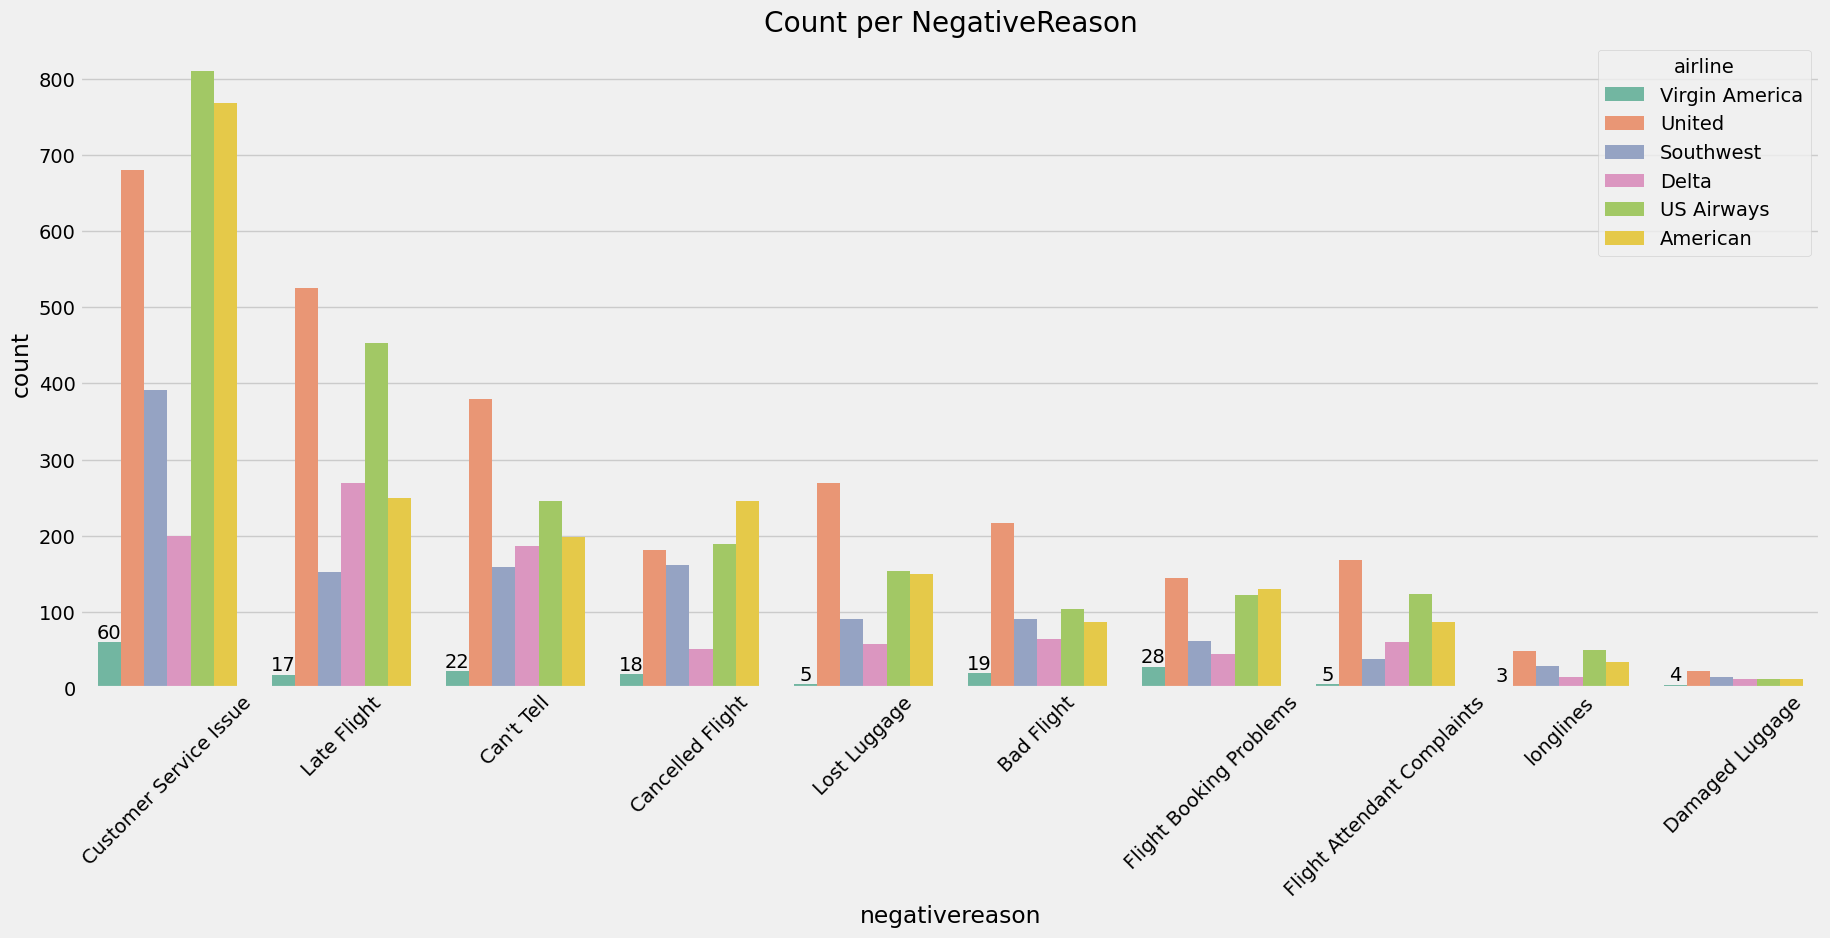

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = df_neg, x = 'negativereason',
                   palette='Set2',
                   order = df_neg.negativereason.value_counts().index, hue = 'airline')

ax.bar_label(ax.containers[0])
ax.set_title('Count per NegativeReason')
plt.xticks(rotation=45)
plt.show()

In [ ]:
names = df.airline.unique()
for name in names:
    print(f"{name} : Out of total {format(len(df[df.airline == name]),',')}customers, {(len(df_neg[df_neg.airline == name]) / len(df[df.airline == name]))*100:.1f}% feel negative.\n")

Virgin America : Out of total 504customers, 35.9% feel negative.

United : Out of total 3,822customers, 68.9% feel negative.

Southwest : Out of total 2,420customers, 49.0% feel negative.

Delta : Out of total 2,222customers, 43.0% feel negative.

US Airways : Out of total 2,913customers, 77.7% feel negative.

American : Out of total 2,759customers, 71.0% feel negative.



<br>

* **`American`, `US Airways`, `Southwest`**: Complaints about customer sevice issue is relatively high.

* **`United`** : Customer service issue is the most, but customers for this airline experienced late flight more frequently than others. Lost luggage issue happened relatively high.

* **`Delta`**: Customer service looks not bad, but most of customers experienced late flight.

* **`Virgin America`**: Mostly about customer service followed by flight booking problem.

<br>

## Text Preprocessing

* Tweet text is consisted of 103 length in average.
* Minimum length is 12, and maximum one is 186.

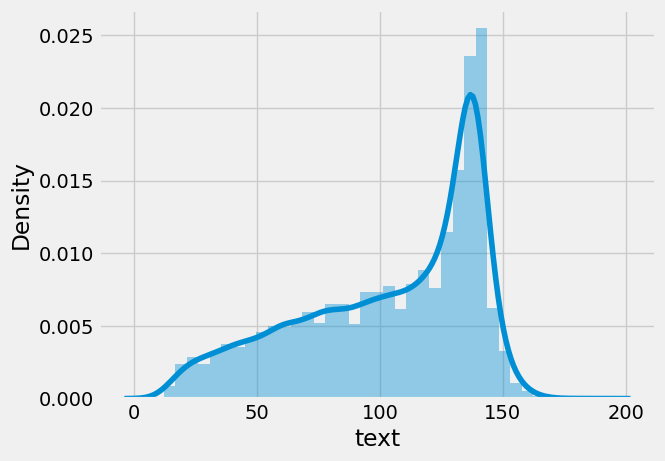

In [ ]:
sns.distplot(df.text.str.len())

plt.show()

In [ ]:
df.text.str.len().describe()

count    14640.000000
mean       103.822063
std         36.277339
min         12.000000
25%         77.000000
50%        114.000000
75%        136.000000
max        186.000000
Name: text, dtype: float64

### Procedure
* Regular expression
* Tokenization
* Checking Stopwords

In [ ]:
# We will go over the sampled text as below.
# Every tweets share the common rule starting with @ + airlines' name.
# We can also see there are http formats, emojis, and hashtag

print(df.text[0].split(),'\n')
print(df.text[1].split(),'\n')
print(df.text[100].split(),'\n')
print(df.text[1000].split(),'\n')
print(df.text[10000].split())

['@VirginAmerica', 'What', '@dhepburn', 'said.'] 

['@VirginAmerica', 'plus', "you've", 'added', 'commercials', 'to', 'the', 'experience...', 'tacky.'] 

['@VirginAmerica', 'trying', 'to', 'add', 'my', 'boy', 'Prince', 'to', 'my', 'ressie.', 'SF', 'this', 'Thursday', '@VirginAmerica', 'from', 'LAX', 'http://t.co/GsB2J3c4gM'] 

['@united', 'how', 'can', 'you', 'not', 'put', 'my', 'bag', 'on', 'plane', 'to', 'Seattle.', 'Flight', '1212.', 'Waiting', 'in', 'line', 'to', 'talk', 'to', 'someone', 'about', 'my', 'bag.', 'Status', 'should', 'matter.'] 

['@USAirways', 'waiting', 'all', 'day', 'at', 'ATL', 'since', 'flight', 'this', 'am', 'Cancelled', 'Flightled.', '1', 'standby', 'told', 'no', 'seats', 'and', 'group', 'of', '15', 'shows', 'up', 'Late', 'Flight', 'and', 'gets', 'on', 'to', 'PHL']


In [ ]:
# !pip install nltk

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

names = ['delta', 'deltaair', 'united', 'unitedair', 'southwest', 'southwestair', 'usairways',
         'virginamerica', 'american', 'americanair', 'jetblue', 'jetblues', 'usairway',
         'flight', 'airline', 'airlines']

# I thought the words related the name of airlines are not relevant to the sentiment analysis
# Therefore I decided to append the above names into the list of stop words.
def clean_stopword(d):
    stop_words = stopwords.words('english')
    for name in names:
        stop_words.append(name)
    return " ".join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 1])

def tokenize(d):
    return word_tokenize(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df['final_text']= df.text.apply(clean_text).apply(clean_stopword).apply(tokenize)
df.final_text.head()

0                                     [dhepburn, said]
1    [plus, youve, added, commercials, experience, ...
2    [didnt, today, must, mean, need, take, another...
3    [really, aggressive, blast, obnoxious, enterta...
4                            [really, big, bad, thing]
Name: final_text, dtype: object

In [ ]:
print(" ".join(df.final_text[0]),'\n')
print(" ".join(df.final_text[1]),'\n')
print(" ".join(df.final_text[100]),'\n')
print(" ".join(df.final_text[1000]),'\n')
print(" ".join(df.final_text[10000]))

dhepburn said 

plus youve added commercials experience tacky 

trying add boy prince ressie sf thursday lax httptcogsbjcgm 

put bag plane seattle waiting line talk someone bag status matter 

waiting day atl since cancelled flightled standby told seats group shows late gets phl


<br>

## Text Analysis

### Lexicon based approach

The lexicon-based approach involves calculating orientation for a document from the semantic orientation of words or phrases in the document.it uses dictionaries of words annotated with the word's semantic orientation, or polarity.

Here we will just try to verify the lexicon works hopefully very well to classify the sentiment which has already been allocated by the real customers.

#### Vader

Vader is a lexicon made for the sentiment analysis of text data on social media.

It returns the compounded polarity score of a sentence after calculating the negative, the neutral, and the positive scores of each word in a sentence.

We can use Vader from the innner module in nltk as well as the Python API [vaderSentiment](https://pypi.org/project/vaderSentiment/).

VADER has many advantages over traditional sentiment analysis methods: [source](https://ichi.pro/ko/python-eseo-vaderleul-sayonghayeo-gamjeong-bunseog-dansunhwa-sosyeol-midieo-tegseuteu-274770204542255)

* **It works very well with social media type text**, but generalizes easily to multiple domains.
* It does not require any training data, but consists of a generalized, balence-based, human-curated gold standard psychological vocabulary.
* It's fast enough to use online with streaming data,
* The speed-performance trade-off isn't serious.



In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(" ".join(df.final_text[0]))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
texts = [" ".join(df.final_text[i]) for i in range(len(df))]

print(df.text[0])
print(texts[0])
print(vader.polarity_scores(texts[0]), f'--> Actual Classification: {df.airline_sentiment[0]}', '\n')

print(df.text[1])
print(texts[1])
print(vader.polarity_scores(texts[1]), f'--> Actual Classification: {df.airline_sentiment[1]}', '\n')

print(df.text[10])
print(texts[10])
print(vader.polarity_scores(texts[10]), f'--> Actual Classification: {df.airline_sentiment[10]}', '\n')

print(df.text[100])
print(texts[100])
print(vader.polarity_scores(texts[100]), f'--> Actual Classification: {df.airline_sentiment[100]}', '\n')

print(df.text[1000])
print(texts[1000])
print(vader.polarity_scores(texts[1000]), f'--> Actual Classification: {df.airline_sentiment[1000]}', '\n')

print(df.text[10000])
print(texts[10000])
print(vader.polarity_scores(texts[10000]), f'--> Actual Classification: {df.airline_sentiment[10000]}')

@VirginAmerica What @dhepburn said.
dhepburn said
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} --> Actual Classification: neutral 

@VirginAmerica plus you've added commercials to the experience... tacky.
plus youve added commercials experience tacky
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} --> Actual Classification: positive 

@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24
know suicide second leading cause death among teens
{'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'compound': -0.8555} --> Actual Classification: neutral 

@VirginAmerica trying to add my boy Prince to my ressie. SF this Thursday @VirginAmerica from LAX http://t.co/GsB2J3c4gM
trying add boy prince ressie sf thursday lax httptcogsbjcgm
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} --> Actual Classification: neutral 

@united how can you not put my bag on plane to Seattle. Flight 1212. Waiting  in line to talk to someone about my bag. Status sho

<br>

We realize that some clear sentences could be classified as almost same as the actual classification.

But the very ambiguous(or sarcastic) senteces such as:
* Wanted to get my bag benefit, but instead get $25 pricing on all three tickets. When adding a card, MP Visa is only option. @united
* @SouthwestAir I'm an A-list Preferred customer and very loyal SWA. However, your inflight wifi is no better today than it was 4 years ago.

Sometimes Vader didn't work well to classify the real sentiment and this shows the limitation of current NLP and the way to go at the same time.


<br>

<br>

### WordCloud : Keyword analysis

WordCloud is one of the easiest way to show which word mainly(frequently) appears in the set of sentences.

But it can be just one of pieces of visulalization if there's no appropriate text preprocessing before drawing it.

In [ ]:
# preprocessing before drawing wordcloud separating the sentiment.

positive = df[df.airline_sentiment == 'positive'].text.apply(clean_text).apply(clean_stopword).apply(tokenize)
positive = [" ".join(positive.values[i]) for i in range(len(positive))]
positive = [" ".join(positive)][0]

negative = df[df.airline_sentiment == 'negative'].text.apply(clean_text).apply(clean_stopword).apply(tokenize)
negative = [" ".join(negative.values[i]) for i in range(len(negative))]
negative = [" ".join(negative)][0]

neutral = df[df.airline_sentiment == 'neutral'].text.apply(clean_text).apply(clean_stopword).apply(tokenize)
neutral = [" ".join(neutral.values[i]) for i in range(len(neutral))]
neutral = [" ".join(neutral)][0]

print(len(positive), len(negative), len(neutral))

115931 591416 151075


In [ ]:
from wordcloud import WordCloud

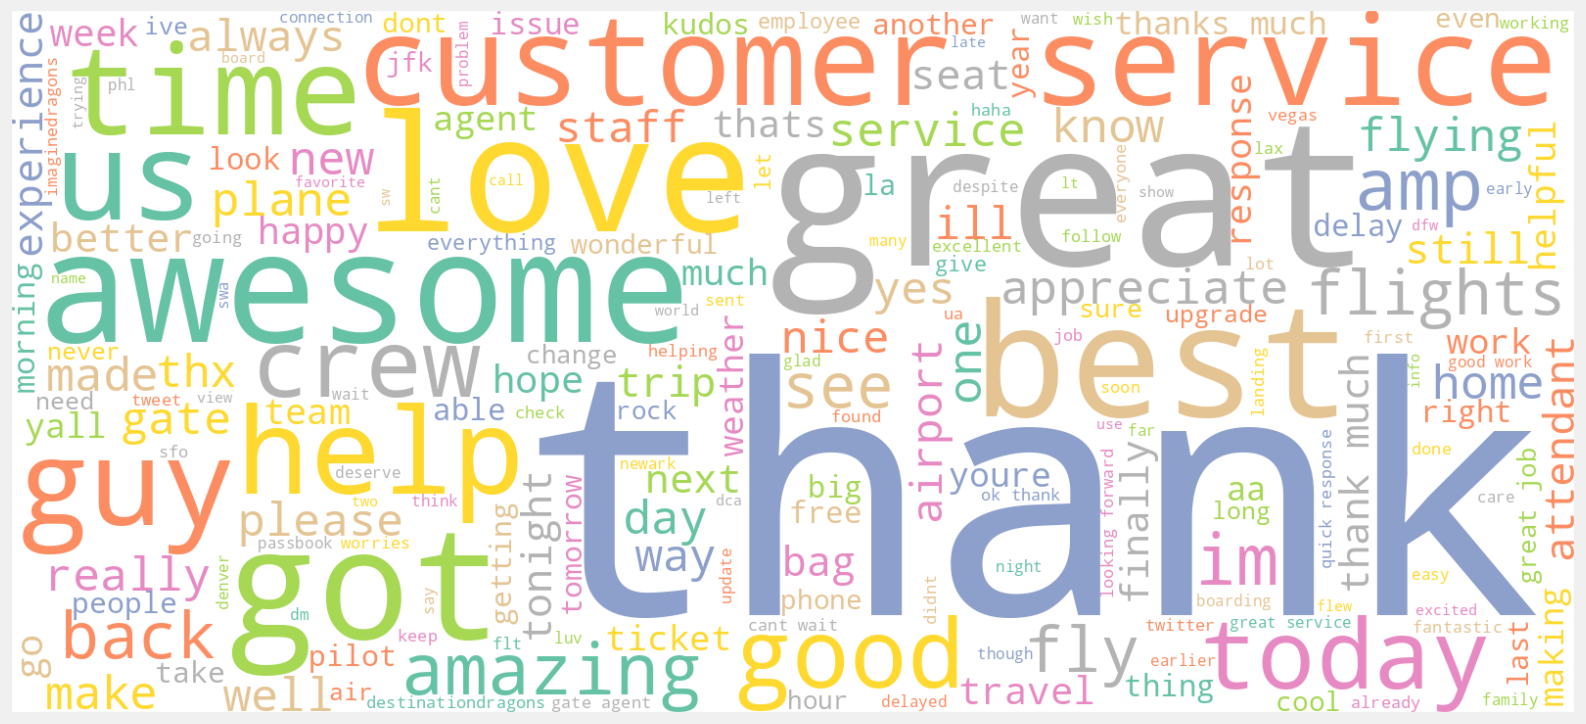

In [ ]:
plt.figure(figsize=(18,15))
wc_positive = WordCloud(min_font_size=3,max_words=200,width=1600,height=720,
                       colormap = 'Set2', background_color='white').generate(positive)

plt.imshow(wc_positive,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

<br>

We can see many positive words such as 'thank', 'great', 'love', etc.

<br>

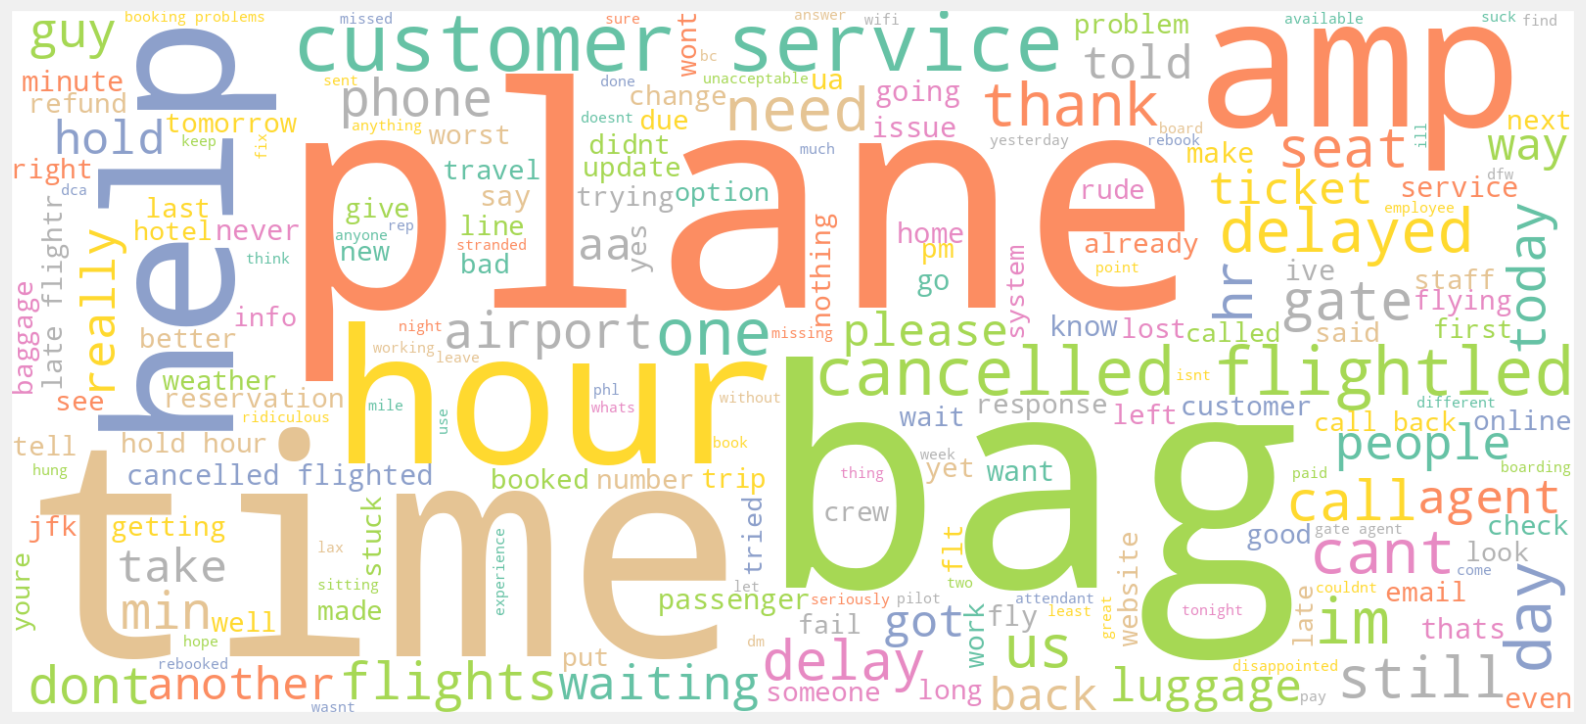

In [ ]:
plt.figure(figsize=(18,15))
wc_negative = WordCloud(min_font_size=3,max_words=200,width=1600,height=720,
                       colormap = 'Set2', background_color='white').generate(negative)

plt.imshow(wc_negative,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

<br>

The main words we can see in the WC of negative sentiment is 'plane', 'bag', 'time', 'customer', 'service', etc.

<br>

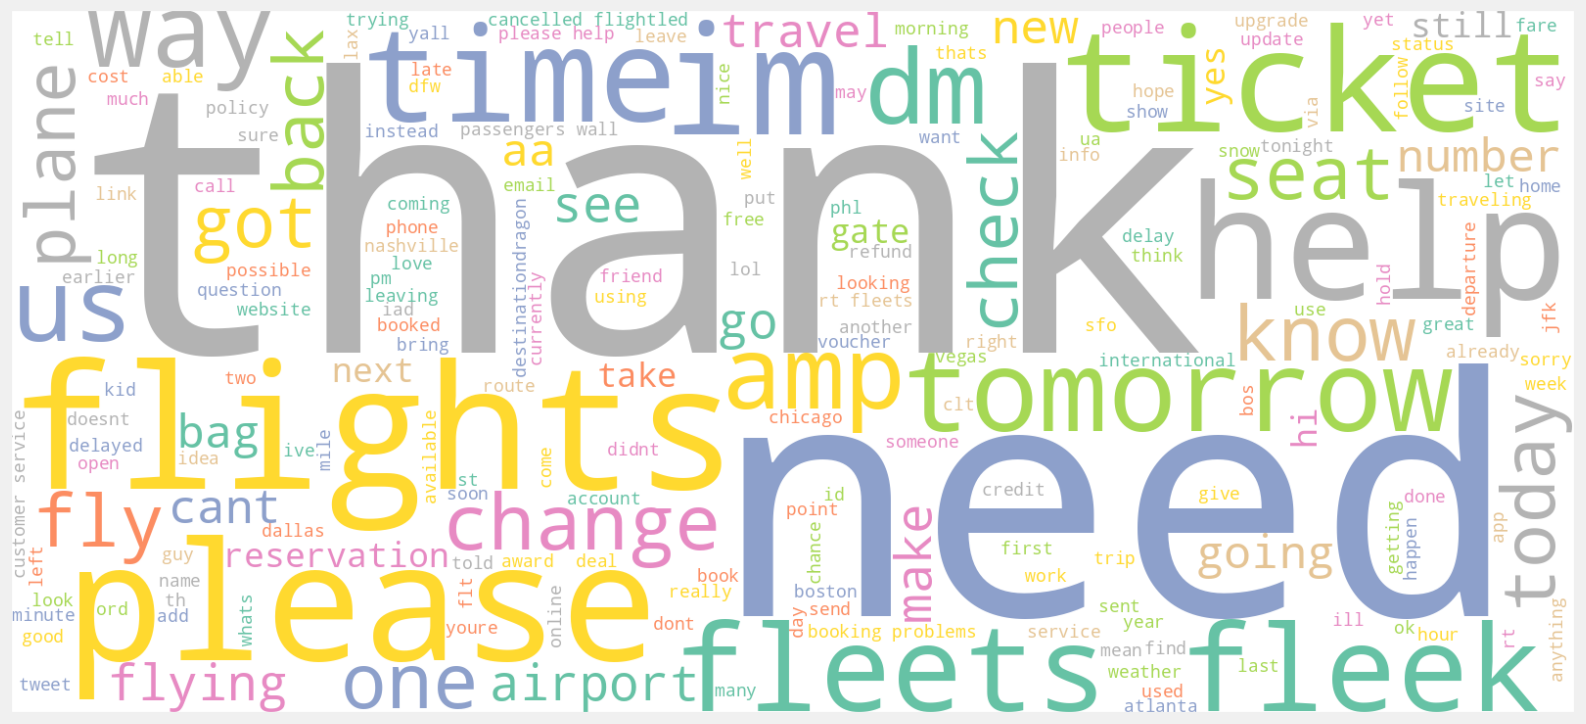

In [ ]:
plt.figure(figsize=(18,15))
wc_neutral = WordCloud(min_font_size=3,max_words=200,width=1600,height=720,
                       colormap = 'Set2', background_color='white').generate(neutral)

plt.imshow(wc_neutral,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

<br>

neutral is just neutral. The only positive word we can see at a glance is 'thank'.
Almost no negative and positive words.

<br>

<br>

### Machine Learning approach

ML approach is also known as Document Classificaton. It uses ML/DL algorithm to classify the text data.

The most important in ML approach is to convert the text to the vector or other numeric format to make the algorithms understand the text as a feature.


* Vectorization : `CountVectorizer`, `TfidfTransformer`, `Word2Vec`
* Model: Logistic Regression, RandomForest, MultinomialNB, SupportVectorMachine, BiLSTM

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
df.final_text

0                                         [dhepburn, said]
1        [plus, youve, added, commercials, experience, ...
2        [didnt, today, must, mean, need, take, another...
3        [really, aggressive, blast, obnoxious, enterta...
4                                [really, big, bad, thing]
                               ...                        
14635                     [thank, got, different, chicago]
14636    [leaving, minutes, late, warnings, communicati...
14637                          [please, bring, blackberry]
14638    [money, change, dont, answer, phones, suggesti...
14639    [ppl, need, know, many, seats, next, plz, put,...
Name: final_text, Length: 14640, dtype: object

In [ ]:
for i in range(len(df)):
    df['final_text'][i] = " ".join(df['final_text'][i])

In [ ]:
df['final_text'][:3]

0                                    dhepburn said
1    plus youve added commercials experience tacky
2     didnt today must mean need take another trip
Name: final_text, dtype: object

In [ ]:
def convert_Sentiment(airline_sentiment):
    if  airline_sentiment == "positive":
        return 2
    elif airline_sentiment == "neutral":
        return 1
    elif airline_sentiment == "negative":
        return 0

df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [ ]:
X = df.final_text
y = df.airline_sentiment

<br>

#### CountVectorizer & TfidfVectorizer

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

model_params = {'random_state':42}
model_list = [LogisticRegression(**model_params, solver='liblinear'),
              RandomForestClassifier(**model_params),
              MultinomialNB(),
              SVC(**model_params)]
model_names = ['LogisticRegression', 'RandomForest', 'MultinomialNB', 'SupportVectorMachine']

c = CountVectorizer()
X_c = c.fit_transform(X)

tf = TfidfVectorizer()
X_tf = tf.fit_transform(X)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model, model_name in zip(model_list, model_names):
    for n_fold, (trn_idx, vld_idx) in enumerate(skf.split(df.index, df.airline_sentiment)):
        X_c_trn = X_c[trn_idx]
        X_tf_trn = X_tf[trn_idx]
        y_trn = df.loc[trn_idx, 'airline_sentiment']

        X_c_vld = X_c[vld_idx]
        X_tf_vld = X_tf[vld_idx]
        y_vld = df.loc[vld_idx, 'airline_sentiment']

        model.fit(X_c_trn, y_trn)
        c_pred_col = f"{model_name}_ct_pred"
        df.loc[vld_idx, c_pred_col] = model.predict(X_c_vld)

        model.fit(X_tf_trn, y_trn)
        tf_pred_col = f"{model_name}_tf_pred"
        df.loc[vld_idx, tf_pred_col] = model.predict(X_tf_vld)

    # Calculate metrics
    c_pred = df[c_pred_col]
    tf_pred = df[tf_pred_col]
    c_precision = precision_score(df.airline_sentiment, c_pred, average='weighted') * 100
    tf_precision = precision_score(df.airline_sentiment, tf_pred, average='weighted') * 100
    c_recall = recall_score(df.airline_sentiment, c_pred, average='weighted') * 100
    tf_recall = recall_score(df.airline_sentiment, tf_pred, average='weighted') * 100
    c_f1 = f1_score(df.airline_sentiment, c_pred, average='weighted') * 100
    tf_f1 = f1_score(df.airline_sentiment, tf_pred, average='weighted') * 100

    print(f"Model: {model_name}, CountVectorizer")
    print(f"  Accuracy: {accuracy_score(df.airline_sentiment, c_pred):.3%}")
    print(f"  Precision: {c_precision:.3f}%")
    print(f"  Recall: {c_recall:.3f}%")
    print(f"  F1-score: {c_f1:.3f}%")

    print(f"Model: {model_name}, TfidfVectorizer")
    print(f"  Accuracy: {accuracy_score(df.airline_sentiment, tf_pred):.3%}")
    print(f"  Precision: {tf_precision:.3f}%")
    print(f"  Recall: {tf_recall:.3f}%")
    print(f"  F1-score: {tf_f1:.3f}%")
    print()


Model: LogisticRegression, CountVectorizer
  Accuracy: 78.921%
  Precision: 78.226%
  Recall: 78.921%
  F1-score: 78.402%
Model: LogisticRegression, TfidfVectorizer
  Accuracy: 76.858%
  Precision: 76.605%
  Recall: 76.858%
  F1-score: 74.473%

Model: RandomForest, CountVectorizer
  Accuracy: 76.926%
  Precision: 75.996%
  Recall: 76.926%
  F1-score: 76.147%
Model: RandomForest, TfidfVectorizer
  Accuracy: 76.660%
  Precision: 75.644%
  Recall: 76.660%
  F1-score: 75.542%

Model: MultinomialNB, CountVectorizer
  Accuracy: 76.100%
  Precision: 74.957%
  Recall: 76.100%
  F1-score: 74.005%
Model: MultinomialNB, TfidfVectorizer
  Accuracy: 68.730%
  Precision: 73.130%
  Recall: 68.730%
  F1-score: 60.990%

Model: SupportVectorMachine, CountVectorizer
  Accuracy: 77.152%
  Precision: 76.234%
  Recall: 77.152%
  F1-score: 75.763%
Model: SupportVectorMachine, TfidfVectorizer
  Accuracy: 76.701%
  Precision: 76.859%
  Recall: 76.701%
  F1-score: 74.012%



<br>

#### Word2Vec

Word2Vec is one of the most popular model to represent a word in a large text corpus as a vector in n-dimensional space.

There are two kinds of W2V, Continuous Bag-of-Words(CBOW) and Skip-Gram.

Skip-gram is used to predict the context word for a given target word. It’s reverse of CBOW algorithm. Here, target word is input while context words are output.

In most case it is known that the predictability of skip-gram is better than the one of CBOW.

We can use `Word2Vec` library from `gensim` and set the option `sg` which is the abbreviation of skip-gram.
    
* 1, if you want to set skip-gram and 0 for CBOW.

In [ ]:
from gensim.models import Word2Vec

texts_w2v = df.final_text.apply(tokenize).to_list()

w2v = Word2Vec(sentences = texts_w2v, window = 3,
               vector_size = 100, min_count = 5, workers = 4, sg = 1)

In [ ]:
texts_w2v[:3]

[['dhepburn', 'said'],
 ['plus', 'youve', 'added', 'commercials', 'experience', 'tacky'],
 ['didnt', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip']]

<br>

`Word2Vec` imported from `gensim` trains the texts at the same time as it is declared by the user.

We can find the similar words with the given word and the examples are represented below.

<br>

In [ ]:
w2v.wv.most_similar('thank')

[('much', 0.9615693688392639),
 ('appreciate', 0.9556581974029541),
 ('thanks', 0.95468670129776),
 ('quick', 0.9421188235282898),
 ('awesome', 0.9405665397644043),
 ('twitter', 0.9380502104759216),
 ('amazing', 0.9351372718811035),
 ('best', 0.9191979169845581),
 ('care', 0.9161367416381836),
 ('company', 0.9151819348335266)]

In [ ]:
w2v.wv.most_similar('customerservice')

[('americanairlines', 0.9930123686790466),
 ('officially', 0.9915286898612976),
 ('abysmal', 0.991462230682373),
 ('neveragain', 0.9904647469520569),
 ('finish', 0.9902107119560242),
 ('nightmare', 0.9901402592658997),
 ('zero', 0.9899581670761108),
 ('communication', 0.9889815449714661),
 ('excuse', 0.988898754119873),
 ('frustrating', 0.9886434674263)]

In [ ]:
w2v.wv.most_similar('crew')

[('ground', 0.9242159724235535),
 ('pilot', 0.92361980676651),
 ('passengers', 0.9118247032165527),
 ('air', 0.910067081451416),
 ('planes', 0.9075785875320435),
 ('landing', 0.9069948792457581),
 ('attendant', 0.8983805179595947),
 ('pilots', 0.897061288356781),
 ('las', 0.8952442407608032),
 ('communication', 0.8920336961746216)]

In [ ]:
w2v.wv.most_similar('delay')

[('delayed', 0.9139743447303772),
 ('stuck', 0.8898753523826599),
 ('runway', 0.8892065286636353),
 ('tarmac', 0.8876795172691345),
 ('three', 0.8787826299667358),
 ('ewr', 0.8778333067893982),
 ('half', 0.8752046227455139),
 ('sat', 0.8742807507514954),
 ('issues', 0.8720768690109253),
 ('ua', 0.8710097670555115)]

In [ ]:
w2v.wv.most_similar('bag')

[('baggage', 0.946545422077179),
 ('luggage', 0.913938581943512),
 ('bags', 0.9074016213417053),
 ('checked', 0.8843227028846741),
 ('carry', 0.8771582841873169),
 ('claim', 0.8645296096801758),
 ('check', 0.8558683395385742),
 ('found', 0.8521922826766968),
 ('lost', 0.8415545225143433),
 ('extra', 0.8286001086235046)]

In [ ]:
w2v.wv.most_similar('ticket')

[('refund', 0.936906099319458),
 ('name', 0.9366918802261353),
 ('award', 0.9335973858833313),
 ('fee', 0.9321839213371277),
 ('credit', 0.9287310242652893),
 ('online', 0.9204906821250916),
 ('tickets', 0.9191291928291321),
 ('card', 0.9185631275177002),
 ('using', 0.9122210741043091),
 ('miles', 0.9098533987998962)]

In [ ]:
w2v.wv.most_similar('booking')

[('reflight', 0.9144700765609741),
 ('problems', 0.812598466873169),
 ('fee', 0.7875474691390991),
 ('miles', 0.7540395855903625),
 ('using', 0.7453162670135498),
 ('process', 0.7344783544540405),
 ('website', 0.7312057018280029),
 ('award', 0.7272084951400757),
 ('online', 0.7228809595108032),
 ('name', 0.7195562124252319)]

In [ ]:
def get_avg_vector(sent):
    vector = np.zeros(100)
    total_words = 0
    for word in sent.split():
        if word in w2v.wv.index_to_key:    # don't use .wv.vocab method in kaggle notebook. instead, use .wv.index_to_key method.
            vector += w2v.wv.word_vec(word)
            total_words += 1
    if total_words > 0:
        return vector / total_words
    else:
        return vector

df['w2v_vector'] = df['final_text'].map(get_avg_vector)
df[['final_text', 'w2v_vector']].head(2)

,final_text,w2v_vector
0,dhepburn said,"[-0.09224513173103333, 0.18961957097053528, 0...."
1,plus youve added commercials experience tacky,"[0.04483763575553894, 0.16923979073762893, 0.0..."


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_params = {'random_state': 42}
model_list = [LogisticRegression(**model_params, solver='liblinear'),
              RandomForestClassifier(**model_params),
              SVC(**model_params)]
model_names = ['LogisticRegression', 'RandomForest', 'SupportVectorMachine']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model, model_name in zip(model_list, model_names):
    for n_fold, (trn_idx, vld_idx) in enumerate(skf.split(df.index, df.airline_sentiment)):
        X_trn = np.stack(df.loc[trn_idx, 'w2v_vector'])
        y_trn = df.loc[trn_idx, 'airline_sentiment']

        X_vld = np.stack(df.loc[vld_idx, 'w2v_vector'])
        y_vld = df.loc[vld_idx, 'airline_sentiment']

        model.fit(X_trn, y_trn)
        pred_col = f"{model_name}_w2v_pred"
        df.loc[vld_idx, pred_col] = model.predict(X_vld)

    # Calculate metrics
    pred = df[pred_col]
    precision = precision_score(df.airline_sentiment, pred, average='weighted') * 100
    recall = recall_score(df.airline_sentiment, pred, average='weighted') * 100
    f1 = f1_score(df.airline_sentiment, pred, average='weighted') * 100

    print(f"Model: {model_name}, Word2Vec")
    print(f"  Accuracy: {accuracy_score(df.airline_sentiment, pred):.3%}")
    print(f"  Precision: {precision:.3f}%")
    print(f"  Recall: {recall:.3f}%")
    print(f"  F1-score: {f1:.3f}%\n")


Model: LogisticRegression, Word2Vec
  Accuracy: 71.148%
  Precision: 69.957%
  Recall: 71.148%
  F1-score: 66.724%

Model: RandomForest, Word2Vec
  Accuracy: 73.279%
  Precision: 71.886%
  Recall: 73.279%
  F1-score: 71.011%

Model: SupportVectorMachine, Word2Vec
  Accuracy: 70.157%
  Precision: 70.552%
  Recall: 70.157%
  F1-score: 63.654%



<br>

We found that the results aren't be improved on the traditional ML algorithms.

It is known that effect from using embedding vector like Word2Vec usually maximizes by using sequence model like RNN.

I will try BiLSTM.

<br>

#### LSTM

In [ ]:
!pip install pydot graphviz

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
max_words = 5000
max_len = 100

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['final_text'][0],'\n')
X, tokenizer = tokenize_pad_sequences(df['final_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 dhepburn said 

After Tokenization & Padding 
 [125   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
y = pd.get_dummies(df.airline_sentiment)
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42, stratify=y_trn)

print('Train:         ', X_trn.shape, y_trn.shape)
print('Validation Set:', X_vld.shape, y_vld.shape)
print('Test Set:      ', X_tst.shape, y_tst.shape)

Train:          (8198, 100) (8198, 3)
Validation Set: (3514, 100) (3514, 3)
Test Set:       (2928, 100) (2928, 3)


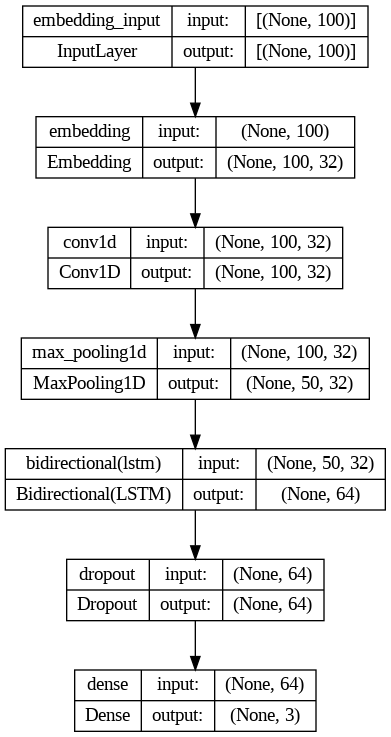

In [ ]:
vocab_size = 5000
embedding_size = 32
epochs=50

model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

plot_model(model, show_shapes = True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 100, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 50, 32)            0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

In [ ]:
es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64

history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    callbacks = [es])

Epoch 1/50
129/129 [==============================] - 14s 67ms/step - loss: 0.8524 - accuracy: 0.6387 - val_loss: 0.6776 - val_accuracy: 0.6927
Epoch 2/50
129/129 [==============================] - 8s 60ms/step - loss: 0.6183 - accuracy: 0.7224 - val_loss: 0.6227 - val_accuracy: 0.7538
Epoch 3/50
129/129 [==============================] - 7s 55ms/step - loss: 0.4842 - accuracy: 0.8048 - val_loss: 0.6149 - val_accuracy: 0.7666
Epoch 4/50
129/129 [==============================] - 9s 70ms/step - loss: 0.3885 - accuracy: 0.8561 - val_loss: 0.6465 - val_accuracy: 0.7746
Epoch 5/50
129/129 [==============================] - 7s 54ms/step - loss: 0.3103 - accuracy: 0.8922 - val_loss: 0.7168 - val_accuracy: 0.7721
Epoch 6/50
129/129 [==============================] - 9s 68ms/step - loss: 0.2639 - accuracy: 0.9141 - val_loss: 0.7301 - val_accuracy: 0.7627
Epoch 7/50
129/129 [==============================] - 7s 53ms/step - loss: 0.2007 - accuracy: 0.9302 - val_loss: 0.8060 - val_accuracy: 0.768

In [ ]:
from sklearn.metrics import classification_report

# Evaluate model on the test set
loss, accuracy = model.evaluate(X_tst, y_tst, verbose=0)

# Predict on the test set
y_pred_probs = model.predict(X_tst)
y_pred = y_pred_probs.argmax(axis=-1)  # Assuming a multi-class classification

# Convert y_tst to NumPy array if it's a DataFrame
y_tst = y_tst.values if isinstance(y_tst, pd.DataFrame) else y_tst

# Convert y_tst to labels if it's one-hot encoded
y_tst_labels = y_tst.argmax(axis=-1) if y_tst.ndim > 1 else y_tst

# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))
print(classification_report(y_tst_labels, y_pred, digits=4))


92/92 [==============================] - 2s 16ms/step
Accuracy  : 0.7544
              precision    recall  f1-score   support

           0     0.8460    0.8381    0.8420      1835
           1     0.5298    0.5871    0.5570       620
           2     0.7258    0.6490    0.6853       473

    accuracy                         0.7544      2928
   macro avg     0.7005    0.6914    0.6948      2928
weighted avg     0.7596    0.7544    0.7564      2928



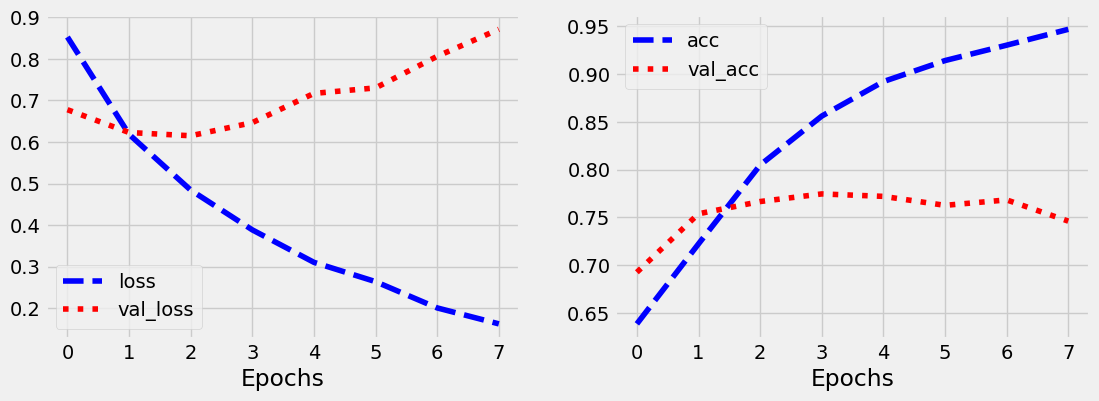

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

92/92 [==============================] - 1s 11ms/step


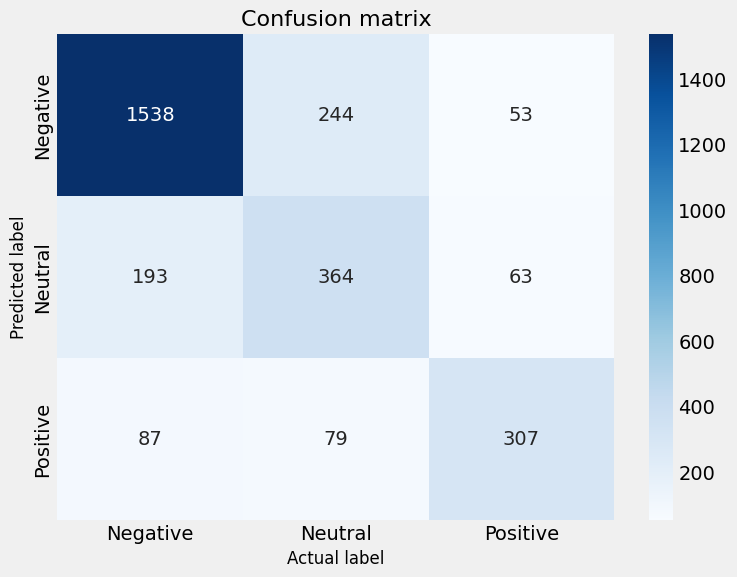

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_tst, y_tst)

<br>

## Improvement

* Trying to use 'NegativeReason' feature to improve the predictivity of models.

In [ ]:
df['final_text_2'] = df['negativereason'] + ' ' + df['final_text']
df[['final_text' , 'final_text_2']]

,final_text,final_text_2
0,dhepburn said,NaN
1,plus youve added commercials experience tacky,NaN
2,didnt today must mean need take another trip,NaN
3,really aggressive blast obnoxious entertainmen...,Bad Flight really aggressive blast obnoxious e...
4,really big bad thing,Can't Tell really big bad thing
...,...,...
14635,thank got different chicago,NaN
14636,leaving minutes late warnings communication mi...,Customer Service Issue leaving minutes late wa...
14637,please bring blackberry,NaN
14638,money change dont answer phones suggestions ma...,Customer Service Issue money change dont answe...


In [ ]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len = 100

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequences of integers and then
    pad each sequence to the same length
    '''
    # Convert to string and handle NaN values
    text = text.astype(str)
    text = text.fillna('')

    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)

    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)

    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)

    # return sequences
    return X, tokenizer

# Ensure 'final_text_2' column is string and handle NaN values
df['final_text_2'] = df['final_text_2'].astype(str).fillna('')

print('Before Tokenization & Padding \n', df['final_text_2'][0],'\n')
X, tokenizer = tokenize_pad_sequences(df['final_text_2'])
print('After Tokenization & Padding \n', X[0])


Before Tokenization & Padding 
 nan 

After Tokenization & Padding 
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# y = pd.get_dummies(df.sentiment)
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42, stratify=y_trn)

print('Train:         ', X_trn.shape, y_trn.shape)
print('Validation Set:', X_vld.shape, y_vld.shape)
print('Test Set:      ', X_tst.shape, y_tst.shape)

Train:          (8198, 100) (8198, 3)
Validation Set: (3514, 100) (3514, 3)
Test Set:       (2928, 100) (2928, 3)


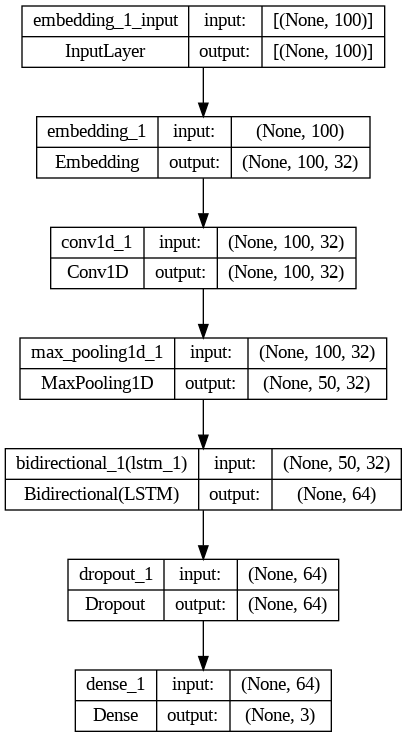

In [ ]:
vocab_size = 5000
embedding_size = 32
epochs=50

model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

plot_model(model, show_shapes = True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 32)           3104      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 50, 32)            0         
 g1D)                                                            
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                

In [ ]:
es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64

history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    callbacks = [es])

Epoch 1/50
129/129 [==============================] - 14s 70ms/step - loss: 0.5435 - accuracy: 0.7403 - val_loss: 0.2706 - val_accuracy: 0.8386
Epoch 2/50
129/129 [==============================] - 7s 55ms/step - loss: 0.2676 - accuracy: 0.8303 - val_loss: 0.2588 - val_accuracy: 0.8386
Epoch 3/50
129/129 [==============================] - 9s 71ms/step - loss: 0.2605 - accuracy: 0.8300 - val_loss: 0.2564 - val_accuracy: 0.8386
Epoch 4/50
129/129 [==============================] - 7s 54ms/step - loss: 0.2584 - accuracy: 0.8337 - val_loss: 0.2587 - val_accuracy: 0.8386
Epoch 5/50
129/129 [==============================] - 9s 69ms/step - loss: 0.2593 - accuracy: 0.8351 - val_loss: 0.2561 - val_accuracy: 0.8386
Epoch 6/50
129/129 [==============================] - 7s 56ms/step - loss: 0.2577 - accuracy: 0.8363 - val_loss: 0.2566 - val_accuracy: 0.8386
Epoch 7/50
129/129 [==============================] - 8s 63ms/step - loss: 0.2572 - accuracy: 0.8365 - val_loss: 0.2572 - val_accuracy: 0.838

In [ ]:
from sklearn.metrics import classification_report

# Evaluate model on the test set
loss, accuracy = model.evaluate(X_tst, y_tst, verbose=0)

# Predict on the test set
y_pred_probs = model.predict(X_tst)
y_pred = y_pred_probs.argmax(axis=-1)  # Assuming a multi-class classification

# Convert y_tst to NumPy array if it's a DataFrame
y_tst = y_tst.values if isinstance(y_tst, pd.DataFrame) else y_tst

# Convert y_tst to labels if it's one-hot encoded
y_tst_labels = y_tst.argmax(axis=-1) if y_tst.ndim > 1 else y_tst

# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))
print(classification_report(y_tst_labels, y_pred, digits=4))


92/92 [==============================] - 4s 20ms/step
Accuracy  : 0.8385
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1835
           1     0.5672    1.0000    0.7239       620
           2     0.0000    0.0000    0.0000       473

    accuracy                         0.8385      2928
   macro avg     0.5224    0.6667    0.5746      2928
weighted avg     0.7468    0.8385    0.7800      2928



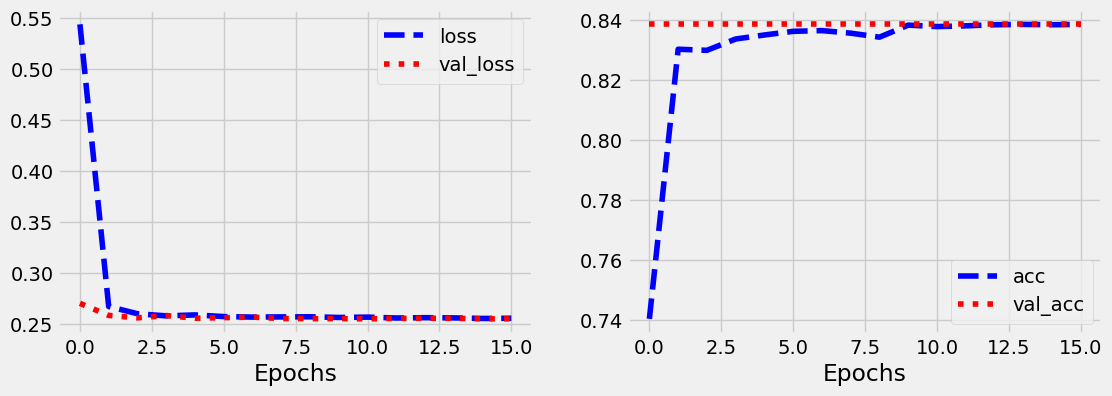

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

92/92 [==============================] - 1s 10ms/step


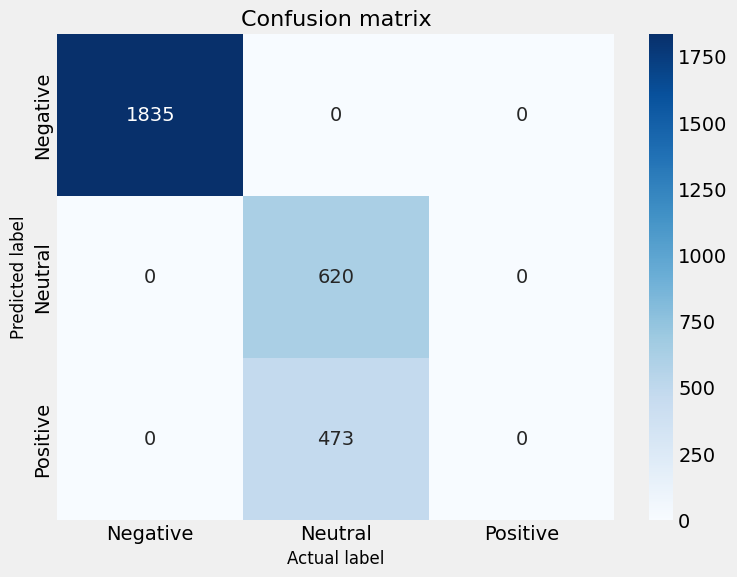

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_tst, y_tst)

<br>

We were able to improve the predictability of our LSTM model just after merging the keyword of negative reason with the preprocessed texts.

As we can see in the confusion matrix, the Recall score of each class has also been highly imporved.

In [ ]:
# Save the model architecture & the weights
model.save('best_model.h5')
print('Best model saved')

Best model saved


<br>

## Test with another tweets dataset

* There is another Tweets.csv dataset and I will try to classify the sentiment of this text data with the previous model.

In [ ]:
model = load_model('best_model.h5')

In [ ]:
df_new = pd.read_csv('Tweets_test.csv')

df_new.head(3)

,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)


In [ ]:
df_new['final_text']= df_new.text.apply(clean_text).apply(clean_stopword).apply(tokenize)

for i in range(len(df_new)):
    df_new['final_text'][i] = " ".join(df_new['final_text'][i])

df_new.final_text.head()

0                                        dhepburn said
1        plus youve added commercials experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: final_text, dtype: object

In [ ]:
df_new['final_text_2'] = df_new['negativereason'].fillna('') + ' ' + df_new['final_text']
df_new[['final_text' , 'final_text_2']]

,final_text,final_text_2
0,dhepburn said,dhepburn said
1,plus youve added commercials experience tacky,plus youve added commercials experience tacky
2,didnt today must mean need take another trip,didnt today must mean need take another trip
3,really aggressive blast obnoxious entertainmen...,Bad Flight really aggressive blast obnoxious e...
4,really big bad thing,Can't Tell really big bad thing
...,...,...
14635,thank got different chicago,thank got different chicago
14636,leaving minutes late warnings communication mi...,Customer Service Issue leaving minutes late wa...
14637,please bring blackberry,please bring blackberry
14638,money change dont answer phones suggestions ma...,Customer Service Issue money change dont answe...


In [ ]:
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

df_new.airline_sentiment = df_new.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [ ]:
max_words = 5000
max_len = 100

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df_new['final_text_2'][0],'\n')
X, tokenizer = tokenize_pad_sequences(df_new['final_text_2'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
  dhepburn said 

After Tokenization & Padding 
 [132   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
y = pd.get_dummies(df_new.airline_sentiment)
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42, stratify=y_trn)

print('Train:         ', X_trn.shape, y_trn.shape)
print('Validation Set:', X_vld.shape, y_vld.shape)
print('Test Set:      ', X_tst.shape, y_tst.shape)

Train:          (8198, 100) (8198, 3)
Validation Set: (3514, 100) (3514, 3)
Test Set:       (2928, 100) (2928, 3)


In [ ]:
vocab_size = 5000
embedding_size = 32
epochs=50

model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64

history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    callbacks = [es])

Epoch 1/50
129/129 [==============================] - 16s 93ms/step - loss: 0.6042 - accuracy: 0.7216 - val_loss: 0.2852 - val_accuracy: 0.8315
Epoch 2/50
129/129 [==============================] - 7s 56ms/step - loss: 0.2739 - accuracy: 0.8348 - val_loss: 0.2514 - val_accuracy: 0.8725
Epoch 3/50
129/129 [==============================] - 9s 70ms/step - loss: 0.2154 - accuracy: 0.8939 - val_loss: 0.1961 - val_accuracy: 0.9146
Epoch 4/50
129/129 [==============================] - 7s 56ms/step - loss: 0.1523 - accuracy: 0.9497 - val_loss: 0.1676 - val_accuracy: 0.9252
Epoch 5/50
129/129 [==============================] - 9s 73ms/step - loss: 0.0879 - accuracy: 0.9684 - val_loss: 0.1905 - val_accuracy: 0.9246
Epoch 6/50
129/129 [==============================] - 9s 73ms/step - loss: 0.0631 - accuracy: 0.9785 - val_loss: 0.2099 - val_accuracy: 0.9200
Epoch 7/50
129/129 [==============================] - 11s 85ms/step - loss: 0.0468 - accuracy: 0.9869 - val_loss: 0.2485 - val_accuracy: 0.92

In [ ]:
from sklearn.metrics import classification_report

# Evaluate model on the test set
loss, accuracy = model.evaluate(X_tst, y_tst, verbose=0)

# Predict on the test set
y_pred_probs = model.predict(X_tst)
y_pred = y_pred_probs.argmax(axis=-1)  # Assuming a multi-class classification

# Convert y_tst to NumPy array if it's a DataFrame
y_tst = y_tst.values if isinstance(y_tst, pd.DataFrame) else y_tst

# Convert y_tst to labels if it's one-hot encoded
y_tst_labels = y_tst.argmax(axis=-1) if y_tst.ndim > 1 else y_tst

# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))
print(classification_report(y_tst_labels, y_pred, digits=4))


92/92 [==============================] - 4s 21ms/step
Accuracy  : 0.9194
              precision    recall  f1-score   support

           0     0.9962    1.0000    0.9981      1835
           1     0.8080    0.8145    0.8112       620
           2     0.7636    0.7442    0.7537       473

    accuracy                         0.9194      2928
   macro avg     0.8559    0.8529    0.8544      2928
weighted avg     0.9188    0.9194    0.9191      2928



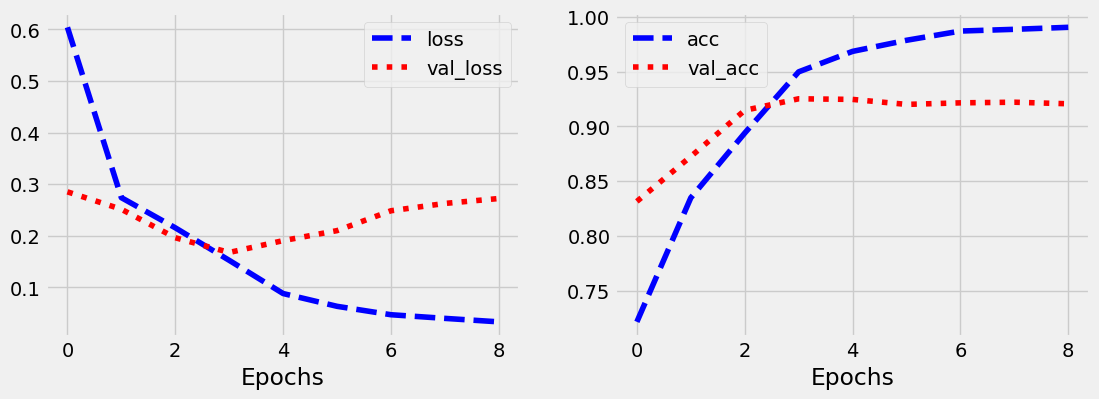

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

92/92 [==============================] - 1s 15ms/step


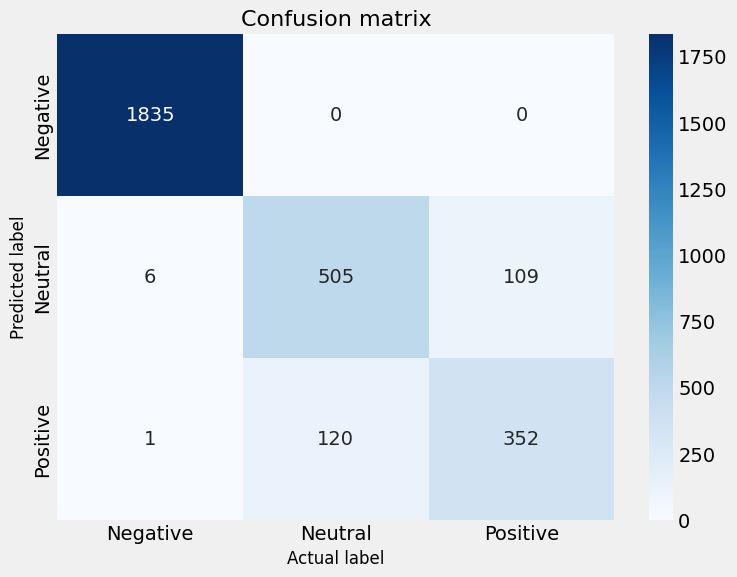

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_tst, y_tst)